
## II. PROBLEM UNDERSTANDING

### 1.	Business Problem

As more people choose Airbnb as their primary accommodation provider, Airbnb has effectively challenged the traditional hotel business. Since its establishment in 2008, Airbnb has experienced tremendous development, with the number of rentals listed on its website increasing at an exponential rate each year. We'll utilize the Airbnb dataset to identify significant trends in customer interest and predict the price and rating of various destinations. We can then provide solutions to business difficulties.

### 2.	Questions

What can we learn about different hosts and areas?
How to predict the price for listings using listing descriptions?
What can we learn from predictions?
Can we find out how many feature that affected the price?
Can we uncover trends in reviews of Airbnb visitors to different locations?



## III. DATA UNDERSTANDING

### 1.	Data Source

The Inside Airbnb dataset contains approximately 1.2 million listings from various countries across the world. It also has 84 distinct listing characteristics.

In this project, we use the dataset of US listings and European listings in The Inside Airbnb. It contains over 800,000 listings and 27 useful features.

### 2.	Number of observations

821,335

### 3.	Number of features, meaning of features (data dictionary)

27

### 4.	Data Dictionary (Meaning of featureS)

In [ ]:
######### Data Dictionary #########

# There are 27 columns in this dataset and their description are as follows.

# accommodates: The maximum capacity of the listing

# amenities: 

# availability_365: The availability of the listing 365 days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.

# bedrooms: The number of bedrooms.

# beds: The number of bed(s)

# calculated_host_listings_count: The number of listings the host has in the current scrape, in the city/region geography.

# host_has_profile_pic: boolean [t=true; f=false]

# host_id: Airbnb's unique identifier for the host/user

# host_identity_verified: boolean [t=true; f=false]

# host_name: Name of the host. Usually just the first name(s).

# host_response_rate: 

# host_response_time: 

# id: Airbnb's unique identifier for the listing

# instant_bookable: [t=true; f=false]. Whether the guest can automatically book the listing without the host requiring to accept their booking request. An indicator of a commercial listing.

# last_review: The date of the last/newest review

# latitude: Uses the World Geodetic System (WGS84) projection for latitude and longitude.

# longitude: Uses the World Geodetic System (WGS84) projection for latitude and longitude.

# maximum_nights: maximum number of night stay for the listing (calendar rules may be different).

# minimum_nights: minimum number of night stay for the listing (calendar rules may be different).

# name: Name of the listing.

# neighbourhood: 

# number_of_reviews: The number of reviews the listing has

# property_type: Self selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field

# reviews_per_month: The number of reviews the listing has over the lifetime of the listing

# review_scores_rating: average rating

# room_type: [ Entire home/apt | Private room | Shared room | Hotel ]

######### Target Variable #########
#
# price
#

## IV. DATA COLLECTION



### 1.	Import libraries

In [ ]:
# Data Collection, Data Cleaning & Data Manipulation
import numpy as np
import pandas as pd
from sklearn import datasets

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Data Transformation
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats

# Models Building
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

## Classification Problems
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Regression Problems
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Explainbale AI (XAI)
!pip install lime
import lime.lime_tabular
!pip install shap
import shap

# Unsupervised Learning: Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, MeanShift, SpectralClustering
from sklearn.metrics import adjusted_rand_score

# Others
# ...

     |████████████████████████████████| 275 kB 6.9 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=cd5b93ed9742803b2ff1419f8fff37ad48e52a648bcebd7a102550308fb8686c
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime
     |████████████████████████████████| 564 kB 16.7 MB/s 


### 2.	Import data

In [ ]:
listing_links = '''http://data.insideairbnb.com/austria/vienna/vienna/2021-11-07/data/listings.csv.gz
http://data.insideairbnb.com/belgium/bru/brussels/2021-10-23/data/listings.csv.gz
http://data.insideairbnb.com/belgium/vlg/antwerp/2021-10-28/data/listings.csv.gz
http://data.insideairbnb.com/belgium/vlg/ghent/2021-10-26/data/listings.csv.gz
http://data.insideairbnb.com/czech-republic/prague/prague/2021-10-22/data/listings.csv.gz
http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2021-10-29/data/listings.csv.gz
http://data.insideairbnb.com/france/auvergne-rhone-alpes/lyon/2021-10-14/data/listings.csv.gz
http://data.insideairbnb.com/france/ile-de-france/paris/2021-10-09/data/listings.csv.gz
http://data.insideairbnb.com/france/nouvelle-aquitaine/bordeaux/2021-10-14/data/listings.csv.gz
http://data.insideairbnb.com/germany/be/berlin/2021-10-21/data/listings.csv.gz
http://data.insideairbnb.com/germany/bv/munich/2021-10-26/data/listings.csv.gz
http://data.insideairbnb.com/greece/attica/athens/2021-10-25/data/listings.csv.gz
http://data.insideairbnb.com/greece/central-macedonia/thessaloniki/2021-10-25/data/listings.csv.gz
http://data.insideairbnb.com/greece/crete/crete/2021-10-28/data/listings.csv.gz
http://data.insideairbnb.com/greece/south-aegean/south-aegean/2021-10-22/data/listings.csv.gz
http://data.insideairbnb.com/ireland/2021-10-21/data/listings.csv.gz
http://data.insideairbnb.com/ireland/leinster/dublin/2021-11-07/data/listings.csv.gz
http://data.insideairbnb.com/italy/campania/naples/2021-10-19/data/listings.csv.gz
http://data.insideairbnb.com/italy/emilia-romagna/bologna/2021-10-19/data/listings.csv.gz
http://data.insideairbnb.com/italy/lazio/rome/2021-10-11/data/listings.csv.gz
http://data.insideairbnb.com/italy/lombardia/bergamo/2021-10-29/data/listings.csv.gz
http://data.insideairbnb.com/italy/lombardy/milan/2021-10-18/data/listings.csv.gz
http://data.insideairbnb.com/italy/puglia/puglia/2021-10-29/data/listings.csv.gz
http://data.insideairbnb.com/italy/sicilia/sicily/2021-10-29/data/listings.csv.gz
http://data.insideairbnb.com/italy/toscana/florence/2021-10-19/data/listings.csv.gz
http://data.insideairbnb.com/italy/trentino-alto-adige-s%C3%BCdtirol/trentino/2021-10-30/data/listings.csv.gz
http://data.insideairbnb.com/italy/veneto/venice/2021-11-04/data/listings.csv.gz
http://data.insideairbnb.com/latvia/riga/riga/2021-10-29/data/listings.csv.gz
http://data.insideairbnb.com/malta/2021-10-28/data/listings.csv.gz
http://data.insideairbnb.com/norway/oslo/oslo/2021-10-29/data/listings.csv.gz
http://data.insideairbnb.com/portugal/lisbon/lisbon/2021-10-15/data/listings.csv.gz
http://data.insideairbnb.com/portugal/norte/porto/2021-10-15/data/listings.csv.gz
http://data.insideairbnb.com/spain/andaluc%C3%ADa/malaga/2021-10-30/data/listings.csv.gz
http://data.insideairbnb.com/spain/andaluc%C3%ADa/sevilla/2021-10-29/data/listings.csv.gz
http://data.insideairbnb.com/spain/catalonia/barcelona/2021-10-10/data/listings.csv.gz
http://data.insideairbnb.com/spain/catalonia/girona/2021-10-29/data/listings.csv.gz
http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2021-11-07/data/listings.csv.gz
http://data.insideairbnb.com/spain/islas-baleares/mallorca/2021-10-14/data/listings.csv.gz
http://data.insideairbnb.com/spain/islas-baleares/menorca/2021-10-30/data/listings.csv.gz
http://data.insideairbnb.com/spain/pv/euskadi/2021-10-29/data/listings.csv.gz
http://data.insideairbnb.com/spain/vc/valencia/2021-10-21/data/listings.csv.gz
http://data.insideairbnb.com/sweden/stockholms-l%C3%A4n/stockholm/2021-10-29/data/listings.csv.gz
http://data.insideairbnb.com/switzerland/geneva/geneva/2021-10-28/data/listings.csv.gz
http://data.insideairbnb.com/switzerland/vd/vaud/2021-11-04/data/listings.csv.gz
http://data.insideairbnb.com/switzerland/z%C3%BCrich/zurich/2021-10-28/data/listings.csv.gz
http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-11-04/data/listings.csv.gz
http://data.insideairbnb.com/united-kingdom/england/bristol/2021-10-25/data/listings.csv.gz
http://data.insideairbnb.com/united-kingdom/england/greater-manchester/2021-10-24/data/listings.csv.gz
http://data.insideairbnb.com/united-kingdom/england/london/2021-10-10/data/listings.csv.gz
http://data.insideairbnb.com/united-kingdom/scotland/edinburgh/2021-10-15/data/listings.csv.gz
http://data.insideairbnb.com/united-states/nc/asheville/2021-10-18/data/listings.csv.gz
http://data.insideairbnb.com/united-states/tx/austin/2021-10-14/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ma/boston/2021-10-19/data/listings.csv.gz
http://data.insideairbnb.com/united-states/fl/broward-county/2021-10-25/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ma/cambridge/2021-10-28/data/listings.csv.gz
http://data.insideairbnb.com/united-states/il/chicago/2021-10-18/data/listings.csv.gz
http://data.insideairbnb.com/united-states/nv/clark-county-nv/2021-10-21/data/listings.csv.gz
http://data.insideairbnb.com/united-states/oh/columbus/2021-10-25/data/listings.csv.gz
http://data.insideairbnb.com/united-states/co/denver/2021-10-29/data/listings.csv.gz
http://data.insideairbnb.com/united-states/hi/hawaii/2021-10-11/data/listings.csv.gz
http://data.insideairbnb.com/united-states/nj/jersey-city/2021-10-23/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ca/los-angeles/2021-10-09/data/listings.csv.gz
http://data.insideairbnb.com/united-states/tn/nashville/2021-10-21/data/listings.csv.gz
http://data.insideairbnb.com/united-states/la/new-orleans/2021-10-09/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ny/new-york-city/2021-10-06/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ca/oakland/2021-10-23/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ca/pacific-grove/2021-10-30/data/listings.csv.gz
http://data.insideairbnb.com/united-states/or/portland/2021-10-22/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ri/rhode-island/2021-10-30/data/listings.csv.gz
http://data.insideairbnb.com/united-states/or/salem-or/2021-10-24/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ca/san-diego/2021-10-23/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ca/san-francisco/2021-10-06/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ca/san-mateo-county/2021-10-24/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ca/santa-clara-county/2021-10-24/data/listings.csv.gz
http://data.insideairbnb.com/united-states/ca/santa-cruz-county/2021-10-30/data/listings.csv.gz
http://data.insideairbnb.com/united-states/wa/seattle/2021-10-23/data/listings.csv.gz
http://data.insideairbnb.com/united-states/mn/twin-cities-msa/2021-10-22/data/listings.csv.gz
http://data.insideairbnb.com/united-states/dc/washington-dc/2021-10-18/data/listings.csv.gz'''

In [ ]:
listing_links = listing_links.split('\n')

In [ ]:
input_df = pd.DataFrame()

In [ ]:
for link in listing_links:
    city_df = pd.read_csv(filepath_or_buffer = link, header = 0)
    input_df = input_df.append(city_df)

Columns (58,59) have mixed types.Specify dtype option on import or set low_memory=False.


In [ ]:
input_df = input_df.reset_index(drop = True)

In [ ]:
features = '''accommodates
amenities
availability_365
bedrooms
beds
calculated_host_listings_count
host_has_profile_pic
host_id
host_identity_verified
host_name
host_response_rate
host_response_time
id
instant_bookable
last_review
latitude
longitude
maximum_nights
minimum_nights
name
neighbourhood
number_of_reviews
price
property_type
review_scores_rating
reviews_per_month
room_type'''
features = sorted(features.split("\n"))
for i in range(len(features)):
  print(i, features[i])

0 accommodates
1 amenities
2 availability_365
3 bedrooms
4 beds
5 calculated_host_listings_count
6 host_has_profile_pic
7 host_id
8 host_identity_verified
9 host_name
10 host_response_rate
11 host_response_time
12 id
13 instant_bookable
14 last_review
15 latitude
16 longitude
17 maximum_nights
18 minimum_nights
19 name
20 neighbourhood
21 number_of_reviews
22 price
23 property_type
24 review_scores_rating
25 reviews_per_month
26 room_type


In [ ]:
my_df = pd.DataFrame()
for feature in features:
  my_df[feature] = input_df[feature]

### 3.	View the data



#### a.	Check Shape (rows, columns)

In [ ]:
my_df.shape

(821335, 27)

#### b.	Check Head

In [ ]:
display(my_df.head())

accommodates  ...        room_type
0             3  ...       Hotel room
1             5  ...  Entire home/apt
2             6  ...  Entire home/apt
3             3  ...  Entire home/apt
4             2  ...     Private room

[5 rows x 27 columns]

#### c.	Check Columns & Types

In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821335 entries, 0 to 821334
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   accommodates                    821335 non-null  int64  
 1   amenities                       821335 non-null  object 
 2   availability_365                821335 non-null  int64  
 3   bedrooms                        759523 non-null  float64
 4   beds                            805219 non-null  float64
 5   calculated_host_listings_count  821335 non-null  int64  
 6   host_has_profile_pic            818178 non-null  object 
 7   host_id                         821335 non-null  int64  
 8   host_identity_verified          818178 non-null  object 
 9   host_name                       818178 non-null  object 
 10  host_response_rate              552498 non-null  object 
 11  host_response_time              552498 non-null  object 
 12  id              

#### d. Check Stats

In [ ]:
my_df.describe()

NameError: ignored

## V. DATA CLEANING, DATA MANIPULATION & DATA VISUALIZATION

### 1.	Add / Clean column names

In [ ]:
my_df.columns

Index(['accommodates', 'amenities', 'availability_365', 'bedrooms', 'beds',
       'calculated_host_listings_count', 'host_has_profile_pic', 'host_id',
       'host_identity_verified', 'host_name', 'host_response_rate',
       'host_response_time', 'id', 'instant_bookable', 'last_review',
       'latitude', 'longitude', 'maximum_nights', 'minimum_nights', 'name',
       'neighbourhood', 'number_of_reviews', 'price', 'property_type',
       'review_scores_rating', 'reviews_per_month', 'room_type'],
      dtype='object')

In [ ]:
my_df.columns = my_df.columns.str.replace(' ', '_').str.strip().str.lower()

my_df.columns

Index(['accommodates', 'amenities', 'availability_365', 'bedrooms', 'beds',
       'calculated_host_listings_count', 'host_has_profile_pic', 'host_id',
       'host_identity_verified', 'host_name', 'host_response_rate',
       'host_response_time', 'id', 'instant_bookable', 'last_review',
       'latitude', 'longitude', 'maximum_nights', 'minimum_nights', 'name',
       'neighbourhood', 'number_of_reviews', 'price', 'property_type',
       'review_scores_rating', 'reviews_per_month', 'room_type'],
      dtype='object')

### 2. Evaluate missing values

#### a. Number of missing values per feature:

In [ ]:
my_df.isna().sum()

accommodates                           0
amenities                              0
availability_365                       0
bedrooms                           61812
beds                               16116
calculated_host_listings_count         0
host_has_profile_pic                3157
host_id                                0
host_identity_verified              3157
host_name                           3157
host_response_rate                268837
host_response_time                268837
id                                     0
instant_bookable                       0
last_review                       180517
latitude                               0
longitude                              0
maximum_nights                         0
minimum_nights                         0
name                                 207
neighbourhood                     333140
number_of_reviews                      0
price                                  0
property_type                          0
review_scores_ra

#### b. Percentage of missing values per feature:

In [ ]:
my_df.isna().mean()*100

accommodates                       0.000000
amenities                          0.000000
availability_365                   0.000000
bedrooms                           7.525796
beds                               1.962171
calculated_host_listings_count     0.000000
host_has_profile_pic               0.384374
host_id                            0.000000
host_identity_verified             0.384374
host_name                          0.384374
host_response_rate                32.731711
host_response_time                32.731711
id                                 0.000000
instant_bookable                   0.000000
last_review                       21.978486
latitude                           0.000000
longitude                          0.000000
maximum_nights                     0.000000
minimum_nights                     0.000000
name                               0.025203
neighbourhood                     40.560794
number_of_reviews                  0.000000
price                           

#### c. Get features that have missing values:

In [ ]:
missing_series = my_df.isna().any()

missing_series

NameError: ignored

In [ ]:
missing_series = missing_series[missing_series == True]

missing_series.index

Index(['bedrooms', 'beds', 'host_has_profile_pic', 'host_identity_verified',
       'host_name', 'host_response_rate', 'host_response_time', 'last_review',
       'name', 'neighbourhood', 'review_scores_rating', 'reviews_per_month'],
      dtype='object')

#### c.	Remove / Replace missing values

Remove rows that have missing values:

In [ ]:
my_df.shape

(821335, 27)

In [ ]:
my_df = my_df.dropna()

In [ ]:
my_df.shape

(270024, 27)

Replace using median:

In [ ]:
# for feature in missing_series.index:
#   median = my_df[feature].median()
#   my_df[feature].fillna(median, inplace = True)

Replace using mode:

In [ ]:
# for feature in missing_series.index:
#   mode = my_df[feature].mode()
#   my_df[feature].fillna(mode, inplace = True)

Replace using previous values:

In [ ]:
# for feature in missing_series.index:
#   my_df[feature].fillna(method = 'ffill', inplace = True)

### 3. Evaluate categorical features



#### Get categorical columns

In [ ]:
categorical_df = my_df.select_dtypes(include = 'object')

In [ ]:
list(categorical_df.columns)

['amenities',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_name',
 'host_response_rate',
 'host_response_time',
 'instant_bookable',
 'last_review',
 'name',
 'neighbourhood',
 'price',
 'property_type',
 'room_type']

#### Convert amenities into number

In [ ]:
test_df = my_df.copy()

In [ ]:
test_df['amenities'] = test_df['amenities'].str.split(',').apply(len)

display(test_df['amenities'].head())

0     19
2     57
8     30
10    27
14    41
Name: amenities, dtype: int64

#### Convert host_has_profile_pic to binary values

In [ ]:
test_df['host_has_profile_pic'].unique()

array(['t', 'f'], dtype=object)

In [ ]:
# Convert 't', 'f' to binary value 0, 1
test_df['host_has_profile_pic'] = test_df["host_has_profile_pic"].replace(['f','t'],[0, 1])
test_df['host_has_profile_pic'].unique()

array([1, 0])

#### Convert host_identity_verified to binary values

In [ ]:
test_df['host_identity_verified'].unique()

array(['t', 'f'], dtype=object)

In [ ]:
# Convert 't', 'f' to binary value 0, 1
test_df['host_identity_verified'] = test_df["host_identity_verified"].replace(['f','t'],[0, 1])
test_df['host_identity_verified'].unique()

array([1, 0])

#### Convert host_response_rate to number

In [ ]:
test_df['host_response_rate'] = test_df['host_response_rate'].str.replace('%', '')
test_df['host_response_rate'] = test_df['host_response_rate'].astype(float) / 100

In [ ]:
test_df.head(1)

accommodates  amenities  ...  reviews_per_month   room_type
0             3         19  ...               0.29  Hotel room

[1 rows x 27 columns]

#### Convert host_response_time to numeric feature

In [ ]:
test_df['host_response_time'].unique()

array(['within an hour', 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

In [ ]:
# Convert 't', 'f' to binary value 0, 1
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
test_df['host_response_time'] = labelencoder.fit_transform(test_df['host_response_time'])

test_df['host_response_time'].unique()

array([3, 2, 1, 0])

#### Convert instant_bookable to binary values

In [ ]:
test_df['instant_bookable'].unique()

array(['f', 't'], dtype=object)

In [ ]:
# Convert 't', 'f' to binary value 0, 1
test_df['instant_bookable'] = test_df["instant_bookable"].replace(['f','t'],[0, 1])
test_df['instant_bookable'].unique()

array([0, 1])

#### Convert price to number

In [ ]:
test_df['price'] = test_df['price'].str.replace(',', '')
test_df['price'] = test_df['price'].str.replace('$', '')
test_df['price'] = test_df['price'].astype(float)

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


#### Convert room_type using dummy variables

In [ ]:
test_df = pd.get_dummies(test_df, columns = ['room_type'])

In [ ]:
test_df.head(3)

accommodates  amenities  ...  room_type_Private room  room_type_Shared room
0             3         19  ...                       0                      0
2             6         57  ...                       0                      0
8             2         30  ...                       1                      0

[3 rows x 30 columns]

#### Clean names of columns

In [ ]:
test_df.columns = test_df.columns.str.replace(' ', '_').str.strip().str.lower()

In [ ]:
test_df.head(3)

accommodates  amenities  ...  room_type_private_room  room_type_shared_room
0             3         19  ...                       0                      0
2             6         57  ...                       0                      0
8             2         30  ...                       1                      0

[3 rows x 30 columns]

In [ ]:
my_df = test_df

### 4.	Evaluate numeric features



#### a.	Get numeric features

In [ ]:
numeric_df = my_df.select_dtypes(include = 'number')

In [ ]:
list(numeric_df.columns)

['accommodates',
 'amenities',
 'availability_365',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_response_rate',
 'host_response_time',
 'id',
 'instant_bookable',
 'latitude',
 'longitude',
 'maximum_nights',
 'minimum_nights',
 'number_of_reviews',
 'price',
 'review_scores_rating',
 'reviews_per_month',
 'room_type_entire_home/apt',
 'room_type_hotel_room',
 'room_type_private_room',
 'room_type_shared_room']

#### b.	Deal with outliers of all features

In [ ]:
test_df = numeric_df.copy()

test_df.shape

(270024, 25)

In [ ]:
test_df.shape

(270024, 25)

In [ ]:
# # Inter Quartile Range
# for i in range(len(test_df.columns)):
#   Q1 = test_df.iloc[:, i].quantile(0.25)
#   Q3 = test_df.iloc[:, i].quantile(0.75)
#   IQR = Q3 - Q1

#   upper_bound = Q3 + 1.5 * IQR
#   lower_bound = Q1 - 1.5 * IQR

#   not_outliers_condition = test_df.iloc[:, i].between(lower_bound, upper_bound, inclusive = True)

#   test_df = test_df[not_outliers_condition]

In [ ]:
for i in range(len(test_df.columns)):
  lower_bound = test_df.iloc[:, i].quantile(0.025)
  upper_bound = test_df.iloc[:, i].quantile(0.975)

  not_outliers_condition = test_df.iloc[:, i].between(lower_bound, upper_bound, inclusive = True)

  test_df = test_df[not_outliers_condition]

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.


In [ ]:
test_df.shape

(152473, 25)

In [ ]:
test_df = test_df.reset_index(drop = True)

In [ ]:
numeric_df = test_df

Data Visualization

To output multiple subplots, the figure containing the passed axes is being cleared


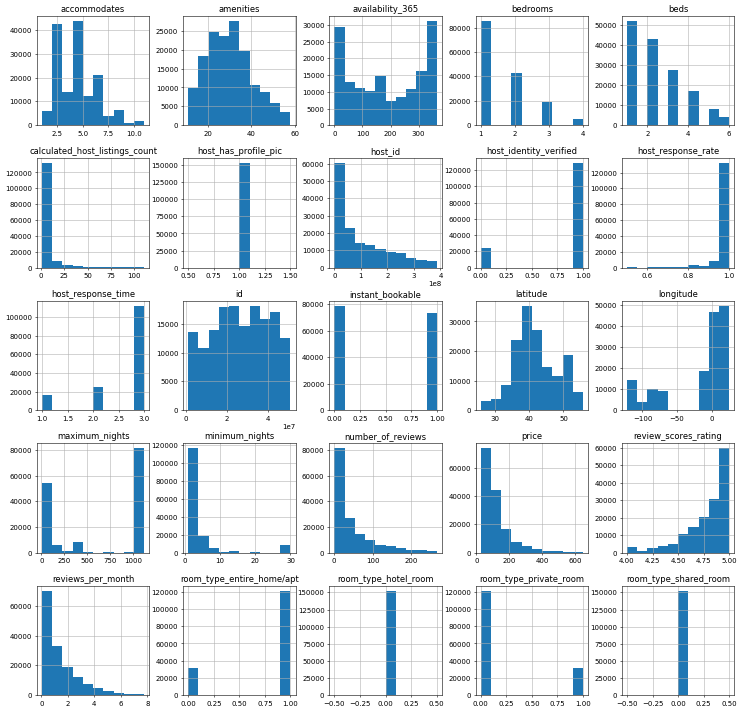

In [ ]:
fig = plt.figure(figsize = (18, 18), dpi=50)
ax = fig.gca()
numeric_df.hist(ax=ax)
plt.show()

## VI. DATA REDUCTION (FEATURES SELECTION / FEATURES EXTRACTION)



#### All numeric features

In [ ]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152473 entries, 0 to 152472
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   accommodates                    152473 non-null  int64  
 1   amenities                       152473 non-null  int64  
 2   availability_365                152473 non-null  int64  
 3   bedrooms                        152473 non-null  float64
 4   beds                            152473 non-null  float64
 5   calculated_host_listings_count  152473 non-null  int64  
 6   host_has_profile_pic            152473 non-null  int64  
 7   host_id                         152473 non-null  int64  
 8   host_identity_verified          152473 non-null  int64  
 9   host_response_rate              152473 non-null  float64
 10  host_response_time              152473 non-null  int64  
 11  id                              152473 non-null  int64  
 12  instant_bookable

In [ ]:
numeric_df.describe()

accommodates  ...  room_type_shared_room
count  152473.000000  ...               152473.0
mean        3.919835  ...                    0.0
std         1.905163  ...                    0.0
min         1.000000  ...                    0.0
25%         2.000000  ...                    0.0
50%         4.000000  ...                    0.0
75%         5.000000  ...                    0.0
max        11.000000  ...                    0.0

[8 rows x 25 columns]

#### Get only useful numeric features

In [ ]:
test_df = numeric_df.drop(labels = ['host_id', 'id'], axis = 1)

In [ ]:
test_df = test_df.drop(labels = ['host_has_profile_pic', 'room_type_hotel_room', 'room_type_shared_room'], axis = 1)

In [ ]:
# test_df = test_df.drop(labels = ['host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_response_time', 'room_type_entire_home/apt', 'room_type_hotel_room', 'room_type_private_room', 'room_type_shared_room'], axis = 1)

In [ ]:
test_df = test_df.reset_index(drop = True)

In [ ]:
test_df.head(3)

accommodates  amenities  ...  room_type_entire_home/apt  room_type_private_room
0             5         52  ...                          1                       0
1             4         55  ...                          1                       0
2             1         14  ...                          0                       1

[3 rows x 20 columns]

In [ ]:
numeric_df = test_df

In [ ]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152473 entries, 0 to 152472
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   accommodates                    152473 non-null  int64  
 1   amenities                       152473 non-null  int64  
 2   availability_365                152473 non-null  int64  
 3   bedrooms                        152473 non-null  float64
 4   beds                            152473 non-null  float64
 5   calculated_host_listings_count  152473 non-null  int64  
 6   host_identity_verified          152473 non-null  int64  
 7   host_response_rate              152473 non-null  float64
 8   host_response_time              152473 non-null  int64  
 9   instant_bookable                152473 non-null  int64  
 10  latitude                        152473 non-null  float64
 11  longitude                       152473 non-null  float64
 12  maximum_nights  

To output multiple subplots, the figure containing the passed axes is being cleared


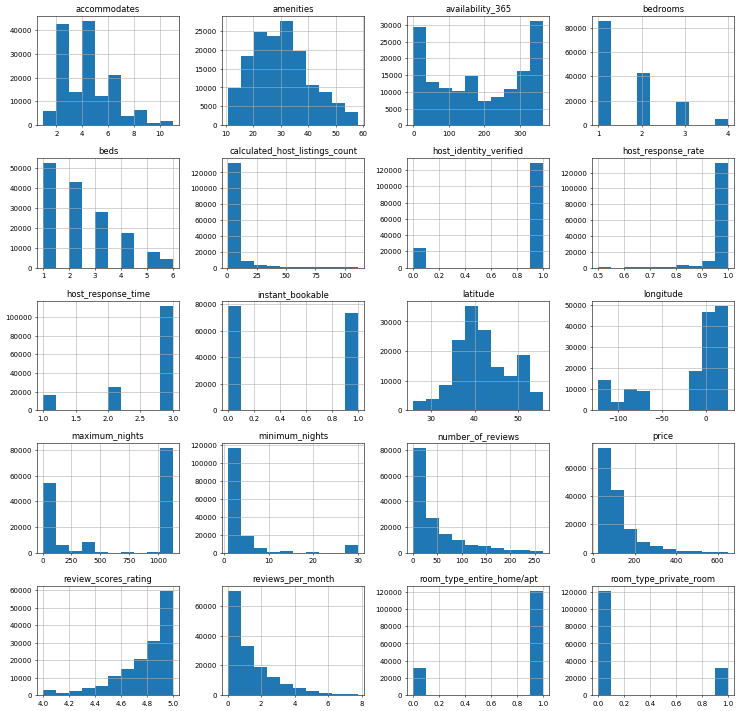

In [ ]:
fig = plt.figure(figsize = (18, 18), dpi=50)
ax = fig.gca()
numeric_df.hist(ax=ax)
plt.show()

## VIII. MODELS BUILDING PREPARATION


### 1.	Separate the target variable in the training set & test set

In [ ]:
X = numeric_df.drop(["price"], axis = 1)

y = numeric_df["price"]

feature_names = X.columns

### 2. Create training set and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [ ]:
X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [ ]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(106731, 19)

(106731,)

(45742, 19)

(45742,)

### 3.	Feature Transformation 

#### a.	Standard Scaler

In [ ]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test  = sc.transform(X_test)

#### b.	Robust Scaler

In [ ]:
rc = RobustScaler()
X_train = rc.fit_transform(X_train)
X_test  = rc.transform(X_test)

## IX. MODELS BUILDING

### 1.	Linear Regression



#### a. Build

In [ ]:
# train RF regressor model
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

Calculate Model coefficients:

In [ ]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", LinearRegression_model.coef_[i].round(4))

Model coefficients:

accommodates = 36.2515
amenities = -0.6305
availability_365 = 4.9236
bedrooms = 31.4074
beds = -12.1013
calculated_host_listings_count = 2.0972
host_identity_verified = 10.8822
host_response_rate = -22.2453
host_response_time = -2.0598
instant_bookable = 1.3216
latitude = 19.7703
longitude = -19.0317
maximum_nights = 2.0173
minimum_nights = -1.1349
number_of_reviews = -5.6764
review_scores_rating = 8.7711
reviews_per_month = -4.6667
room_type_entire_home/apt = 14.8178
room_type_private_room = -14.8178


#### b.	Predict y_train_predict

In [ ]:
y_train_predict = LinearRegression_model.predict(X_train)

Calculate MAE, MSE, RMSE, R2


In [ ]:
print(f'MAE: {mean_absolute_error(y_train, y_train_predict)}')
print(f'MSE: {mean_squared_error(y_train, y_train_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train, y_train_predict))}')
print(f'R^2: {r2_score(y_train, y_train_predict)}')

MAE: 48.38934746257577
MSE: 5431.380277536963
RMSE: 73.6978987321685
R^2: 0.3746943204541314


#### c. Predict y_test_predict

In [ ]:
y_test_predict = LinearRegression_model.predict(X_test)

Calculate MAE, MSE, RMSE, R2


In [ ]:
print(f'MAE: {mean_absolute_error(y_test, y_test_predict)}')
print(f'MSE: {mean_squared_error(y_test, y_test_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_test_predict))}')
print(f'R^2: {r2_score(y_test, y_test_predict)}')

MAE: 48.477298502365464
MSE: 5496.664981345891
RMSE: 74.13949677024986
R^2: 0.3733780197283829


In [ ]:
range(len(y_test))

range(0, 45742)

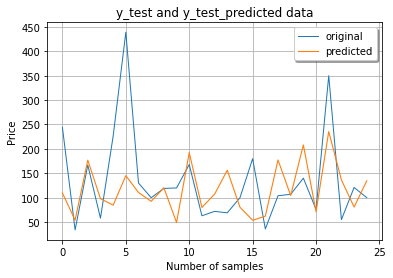

In [ ]:
i = 25
x_ax = range(0, i)
plt.plot(x_ax, y_test[0:i], linewidth = 1, label = "original")
plt.plot(x_ax, y_test_predict[0:i], linewidth = 1.1, label = "predicted")
plt.title("y_test and y_test_predicted data")
plt.xlabel('Number of samples')
plt.ylabel('Price')
plt.legend(loc = 'best',fancybox = True, shadow = True)
plt.grid(True)
plt.show() 

#### d. Explainable AI (XAI)

##### i.	Local Interpretation

##### LIME

In [ ]:
# Instantiating the explainer object by passing in the training set, and the extracted features
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names = feature_names, verbose = True, mode = 'regression')

In [ ]:
# Index corresponding to the test vector
i = 0

# Number denoting the top features
k = 5

# Calling the explain_instance method by passing in the:
# 1) ith test vector
# 2) prediction function used by our prediction model('reg' in this case)
# 3) the top features which we want to see, denoted by k
exp_lime = explainer_lime.explain_instance(X_test[i], LinearRegression_model.predict, num_features=k, num_samples = 5000)

# Finally visualizing the explanations
exp_lime.show_in_notebook()


Intercept 103.9485588147658
Prediction_local [109.62404191]
Right: 109.72914784729116


In [ ]:
# Index corresponding to the test vector
i = 1

# Number denoting the top features
k = 5

# Calling the explain_instance method by passing in the:
# 1) ith test vector
# 2) prediction function used by our prediction model('reg' in this case)
# 3) the top features which we want to see, denoted by k
exp_lime = explainer_lime.explain_instance(X_test[i], LinearRegression_model.predict, num_features=k, num_samples = 5000)

# Finally visualizing the explanations
exp_lime.show_in_notebook()


Intercept 150.96957641802703
Prediction_local [34.54815624]
Right: 53.93941326644113


#### SHAP

In [ ]:
# Create object that can calculate shap values
explainer = shap.LinearExplainer(LinearRegression_model, X_train, feature_dependence="independent")
# Calculate Shap values
shap_values = explainer.shap_values(X_train)

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [ ]:
shap.initjs()
i = 18
shap.force_plot(explainer.expected_value, shap_values[i], X_test[i], feature_names = feature_names)

In [ ]:
# visualize the first 5 predictions explanations with a dark red dark blue color map.
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0:5,:], X_test[0:5,:], plot_cmap = "DrDb", feature_names = feature_names)

In [ ]:
# shap.decision_plot(explainer.expected_value[0], shap_values[0], feature_names = list(feature_names))

##### ii. Global Interpretation

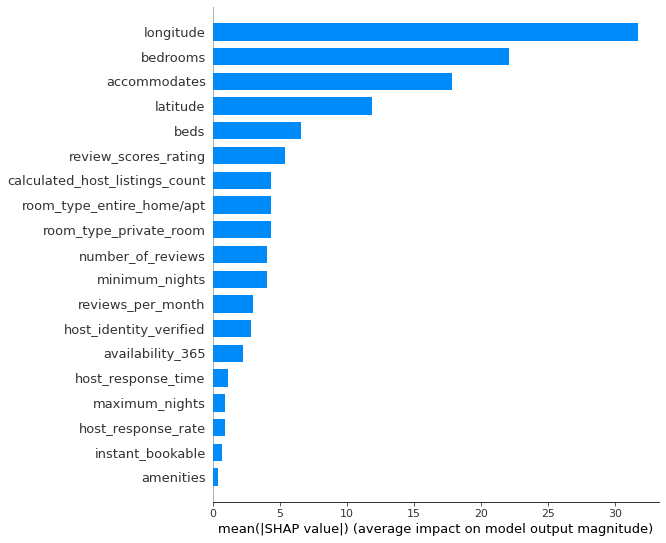

In [ ]:
shap.summary_plot(shap_values, X_train, feature_names = feature_names, plot_type="bar")

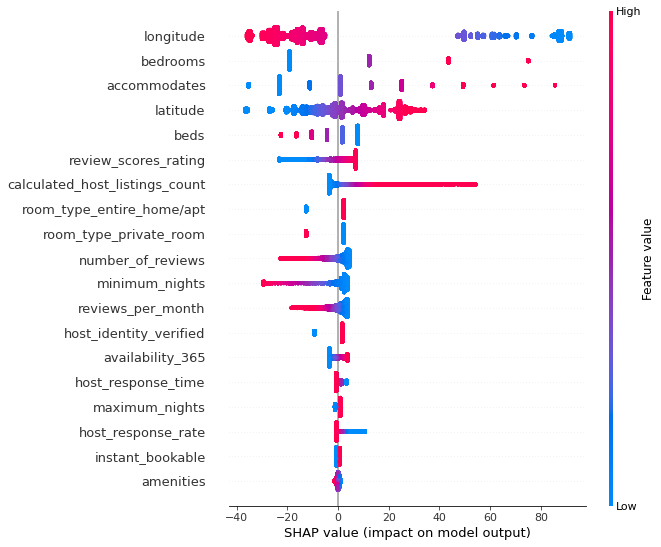

In [ ]:
shap.summary_plot(shap_values, X_train, feature_names = feature_names)

##### PDP

In [ ]:
# shap.dependence_plot(5, shap_values, X_train, feature_names = feature_names)

### 2.	Decision Tree



#### a. Build

In [ ]:
# train RF regressor model
DecisionTree_model = DecisionTreeRegressor(criterion = "friedman_mse", max_depth = 10, random_state = 42)
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, random_state=42)

#### b.	Predict y_train_predict

In [ ]:
y_train_predict = DecisionTree_model.predict(X_train)

Calculate MAE, MSE, RMSE, R2


In [ ]:
print(f'MAE: {mean_absolute_error(y_train, y_train_predict)}')
print(f'MSE: {mean_squared_error(y_train, y_train_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train, y_train_predict))}')
print(f'R^2: {r2_score(y_train, y_train_predict)}')

MAE: 39.6093333659852
MSE: 3719.531663177218
RMSE: 60.987963264706735
R^2: 0.5717765732856888


#### c. Predict y_test_predict

In [ ]:
y_test_predict = DecisionTree_model.predict(X_test)

Calculate MAE, MSE, RMSE, R2


In [ ]:
print(f'MAE: {mean_absolute_error(y_test, y_test_predict)}')
print(f'MSE: {mean_squared_error(y_test, y_test_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_test_predict))}')
print(f'R^2: {r2_score(y_test, y_test_predict)}')

MAE: 42.46259005790539
MSE: 4474.410019580632
RMSE: 66.89103093525044
R^2: 0.48991548938639096


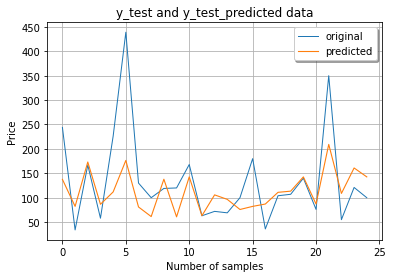

In [ ]:
i = 25
x_ax = range(0, i)
plt.plot(x_ax, y_test[0:i], linewidth = 1, label = "original")
plt.plot(x_ax, y_test_predict[0:i], linewidth = 1.1, label = "predicted")
plt.title("y_test and y_test_predicted data")
plt.xlabel('Number of samples')
plt.ylabel('Price')
plt.legend(loc = 'best',fancybox = True, shadow = True)
plt.grid(True)
plt.show() 

#### d. Explainable AI (XAI)

##### i.	Local Interpretation

##### LIME

In [ ]:
# Instantiating the explainer object by passing in the training set, and the extracted features
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names = feature_names, verbose = True, mode = 'regression')

In [ ]:
# Index corresponding to the test vector
i = 0

# Number denoting the top features
k = 5

# Calling the explain_instance method by passing in the:
# 1) ith test vector
# 2) prediction function used by our prediction model('reg' in this case)
# 3) the top features which we want to see, denoted by k
exp_lime = explainer_lime.explain_instance(X_test[i], DecisionTree_model.predict, num_features=k, num_samples = 5000)

# Finally visualizing the explanations
exp_lime.show_in_notebook()


Intercept 142.44710698906422
Prediction_local [73.07121451]
Right: 137.58461538461538


In [ ]:
# Index corresponding to the test vector
i = 1

# Number denoting the top features
k = 5

# Calling the explain_instance method by passing in the:
# 1) ith test vector
# 2) prediction function used by our prediction model('reg' in this case)
# 3) the top features which we want to see, denoted by k
exp_lime = explainer_lime.explain_instance(X_test[i], DecisionTree_model.predict, num_features=k, num_samples = 5000)

# Finally visualizing the explanations
exp_lime.show_in_notebook()


Intercept 145.95227729127942
Prediction_local [71.22986073]
Right: 82.20965842167256


#### SHAP

In [ ]:
# # Create object that can calculate shap values
# explainer = shap.TreeExplainer(DecisionTree_model)
# # Calculate Shap values
# shap_values = explainer.shap_values(X_train)

In [ ]:
# shap.initjs()
# i = 18
# shap.force_plot(explainer.expected_value, shap_values[i], X_test[i], feature_names = feature_names)

In [ ]:
# # visualize the first 5 predictions explanations with a dark red dark blue color map.
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0:5,:], X_test[0:5,:], plot_cmap = "DrDb", feature_names = feature_names)

In [ ]:
# shap.decision_plot(explainer.expected_value[0], shap_values[0], feature_names = list(feature_names))

##### ii. Global Interpretation

In [ ]:
# shap.summary_plot(shap_values, X_train, feature_names = feature_names, plot_type="bar")

In [ ]:
# shap.summary_plot(shap_values, X_train, feature_names = feature_names)

##### PDP

In [ ]:
# shap.dependence_plot(5, shap_values, X_train, feature_names = feature_names)

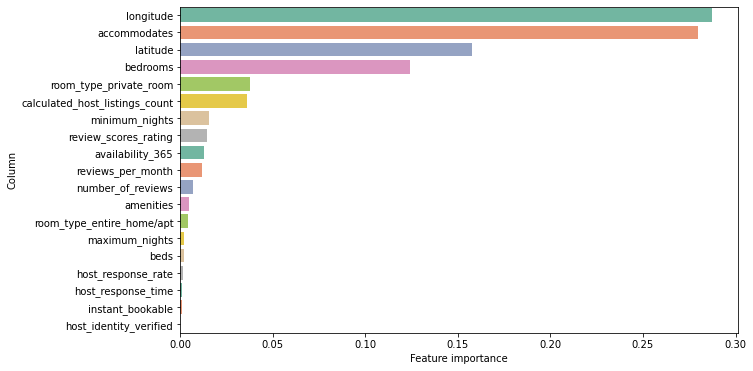

In [ ]:

features_importance = pd.DataFrame(
    {
        'Column': feature_names,
        'Feature importance': DecisionTree_model.feature_importances_
    }
).sort_values('Feature importance', ascending = False)

fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.barplot(x = "Feature importance", y = "Column", data = features_importance, palette = "Set2", orient = 'h');

### 3.	Random Forest



#### a. Build

In [ ]:
# train RF regressor model
RandomForest_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
RandomForest_model.fit(X_train, y_train)

#### b.	Predict y_train_predict

In [ ]:
y_train_predict = RandomForest_model.predict(X_train)

Calculate MAE, MSE, RMSE, R2


In [ ]:
print(f'MAE: {mean_absolute_error(y_train, y_train_predict)}')
print(f'MSE: {mean_squared_error(y_train, y_train_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train, y_train_predict))}')
print(f'R^2: {r2_score(y_train, y_train_predict)}')

#### c. Predict y_test_predict

In [ ]:
y_test_predict = RandomForest_model.predict(X_test)

Calculate MAE, MSE, RMSE, R2


In [ ]:
print(f'MAE: {mean_absolute_error(y_test, y_test_predict)}')
print(f'MSE: {mean_squared_error(y_test, y_test_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_test_predict))}')
print(f'R^2: {r2_score(y_test, y_test_predict)}')

In [ ]:
i = 25
x_ax = range(0, i)
plt.plot(x_ax, y_test[0:i], linewidth = 1, label = "original")
plt.plot(x_ax, y_test_predict[0:i], linewidth = 1.1, label = "predicted")
plt.title("y_test and y_test_predicted data")
plt.xlabel('Number of samples')
plt.ylabel('Price')
plt.legend(loc = 'best',fancybox = True, shadow = True)
plt.grid(True)
plt.show() 

#### d. Explainable AI (XAI)

##### i.	Local Interpretation

##### LIME

In [ ]:
# Instantiating the explainer object by passing in the training set, and the extracted features
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names = feature_names, verbose = True, mode = 'regression')

In [ ]:
# Index corresponding to the test vector
i = 0

# Number denoting the top features
k = 5

# Calling the explain_instance method by passing in the:
# 1) ith test vector
# 2) prediction function used by our prediction model('reg' in this case)
# 3) the top features which we want to see, denoted by k
exp_lime = explainer_lime.explain_instance(X_test[i], RandomForest_model.predict, num_features=k, num_samples = 5000)

# Finally visualizing the explanations
exp_lime.show_in_notebook()


In [ ]:
# Index corresponding to the test vector
i = 1

# Number denoting the top features
k = 5

# Calling the explain_instance method by passing in the:
# 1) ith test vector
# 2) prediction function used by our prediction model('reg' in this case)
# 3) the top features which we want to see, denoted by k
exp_lime = explainer_lime.explain_instance(X_test[i], RandomForest_model.predict, num_features=k, num_samples = 5000)

# Finally visualizing the explanations
exp_lime.show_in_notebook()


#### SHAP

In [ ]:
# # Create object that can calculate shap values
# explainer = shap.TreeExplainer(RandomForest_model)
# # Calculate Shap values
# shap_values = explainer.shap_values(X_train)

In [ ]:
# shap.initjs()
# i = 18
# shap.force_plot(explainer.expected_value, shap_values[i], X_test[i], feature_names = feature_names)

In [ ]:
# # visualize the first 5 predictions explanations with a dark red dark blue color map.
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0:5,:], X_test[0:5,:], plot_cmap = "DrDb", feature_names = feature_names)

In [ ]:
# shap.decision_plot(explainer.expected_value[0], shap_values[0], feature_names = list(feature_names))

##### ii. Global Interpretation

In [ ]:
# shap.summary_plot(shap_values, X_train, feature_names = feature_names, plot_type="bar")

In [ ]:
# shap.summary_plot(shap_values, X_train, feature_names = feature_names)

##### PDP

In [ ]:
# shap.dependence_plot(5, shap_values, X_train, feature_names = feature_names)

##### Feature Importance

In [ ]:

features_importance = pd.DataFrame(
    {
        'Column': feature_names,
        'Feature importance': RandomForest_model.feature_importances_
    }
).sort_values('Feature importance', ascending = False)

fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.barplot(x = "Feature importance", y = "Column", data = features_importance, palette = "Set2", orient = 'h');

### 4. XGBoost


#### a. Build

In [ ]:
#train XGBoost model
XGB_model = XGBRegressor(n_estimators = 100, learning_rate = 0.08, gamma = 0, subsample = 0.75, colsample_bytree = 1, max_depth = 10)

XGB_model.fit(X_train,y_train)

#### b.	Predict y_train_predict

In [ ]:
y_train_predict = XGB_model.predict(X_train)

Calculate MAE, MSE, RMSE, R2


In [ ]:
print(f'MAE: {mean_absolute_error(y_train, y_train_predict)}')
print(f'MSE: {mean_squared_error(y_train, y_train_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train, y_train_predict))}')
print(f'R^2: {r2_score(y_train, y_train_predict)}')

#### c. Predict y_test_predict

In [ ]:
y_test_predict = XGB_model.predict(X_test)

Calculate MAE, MSE, RMSE, R2


In [ ]:
print(f'MAE: {mean_absolute_error(y_test, y_test_predict)}')
print(f'MSE: {mean_squared_error(y_test, y_test_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_test_predict))}')
print(f'R^2: {r2_score(y_test, y_test_predict)}')

In [ ]:
i = 25
x_ax = range(0, i)
plt.plot(x_ax, y_test[0:i], linewidth = 1, label = "original")
plt.plot(x_ax, y_test_predict[0:i], linewidth = 1.1, label = "predicted")
plt.title("y_test and y_test_predicted data")
plt.xlabel('Number of samples')
plt.ylabel('Price')
plt.legend(loc = 'best',fancybox = True, shadow = True)
plt.grid(True)
plt.show() 

#### d. Explainable AI (XAI)

##### i.	Local Interpretation

##### LIME

In [ ]:
# Instantiating the explainer object by passing in the training set, and the extracted features
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names = feature_names, verbose = True, mode = 'regression')

In [ ]:
# Index corresponding to the test vector
i = 0

# Number denoting the top features
k = 5



# Calling the explain_instance method by passing in the:
# 1) ith test vector
# 2) prediction function used by our prediction model('reg' in this case)
# 3) the top features which we want to see, denoted by k
exp_lime = explainer_lime.explain_instance(X_test[i], XGB_model.predict, num_features=k, num_samples = 5000)

# Finally visualizing the explanations
exp_lime.show_in_notebook()


In [ ]:
# Index corresponding to the test vector
i = 1

# Number denoting the top features
k = 5



# Calling the explain_instance method by passing in the:
# 1) ith test vector
# 2) prediction function used by our prediction model('reg' in this case)
# 3) the top features which we want to see, denoted by k
exp_lime = explainer_lime.explain_instance(X_test[i], XGB_model.predict, num_features=k, num_samples = 5000)

# Finally visualizing the explanations
exp_lime.show_in_notebook()


#### SHAP

In [ ]:
# # Create object that can calculate shap values
# explainer = shap.TreeExplainer(XGB_model)
# # Calculate Shap values
# shap_values = explainer.shap_values(X_train)

In [ ]:
# shap.initjs()
# i = 18
# shap.force_plot(explainer.expected_value, shap_values[i], X_test[i], feature_names = feature_names)

In [ ]:
# # visualize the first 5 predictions explanations with a dark red dark blue color map.
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0:5,:], X_test[0:5,:], plot_cmap = "DrDb", feature_names = feature_names)

In [ ]:
# shap.decision_plot(explainer.expected_value[0], shap_values[0], feature_names = list(feature_names))

##### ii. Global Interpretation

In [ ]:
# shap.summary_plot(shap_values, X_train, feature_names = feature_names, plot_type="bar")

In [ ]:
# shap.summary_plot(shap_values, X_train, feature_names = feature_names)

##### PDP

In [ ]:
# shap.dependence_plot(5, shap_values, X_train, feature_names = feature_names)

##### Feature Importance

In [ ]:

features_importance = pd.DataFrame(
    {
        'Column': feature_names,
        'Feature importance': XGB_model.feature_importances_
    }
).sort_values('Feature importance', ascending = False)

fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.barplot(x = "Feature importance", y = "Column", data = features_importance, palette = "Set2", orient = 'h');

In [ ]:
# %%shell
# jupyter nbconvert --to html /content/EAI6000-Group_3-Final_Project-Best.ipynb